In [52]:
import random
from collections import Counter


def ksa(key):
    s = []
    for i in range(0,256):
        s.append(i)
    j = 0
    for i in range(0,256):
        j = (j + s[i] + key[i % len(key)]) % 256
        s[i],s[j] = s[j], s[i]
    return s

def prga(s):
    # print(s)
    i = 0;j = 0
    key = []
    while (i < 10):
        i = (i + 1) % 256
        j = (j + s[i]) % 256
        s[i], s[j] = s[j], s[i]
        t = (s[i] + s[j]) % 256
        keystreambyte = s[t]
        key.append(keystreambyte)
    return key

def randomkeygen(n):
    ky = []
    for i in range(n):
        ky.append(random.randint(0,100000))
    return ky
# print(ksa(3,'101001000001'))
# print(ksa(4,'101001000001'))
# print(prga())

# key = prga()
secondbyte = []
for i in range(100000):
    print(f'done {i}',end= '\r')
    # n = random.randint(1,255) 
    n = 6
    k = randomkeygen(n)
    s = ksa(k)
    key = prga(s)
    secondbyte.append(key[1])

a = Counter(secondbyte)

In [53]:
a[0]/sum(a.values())

0.00791

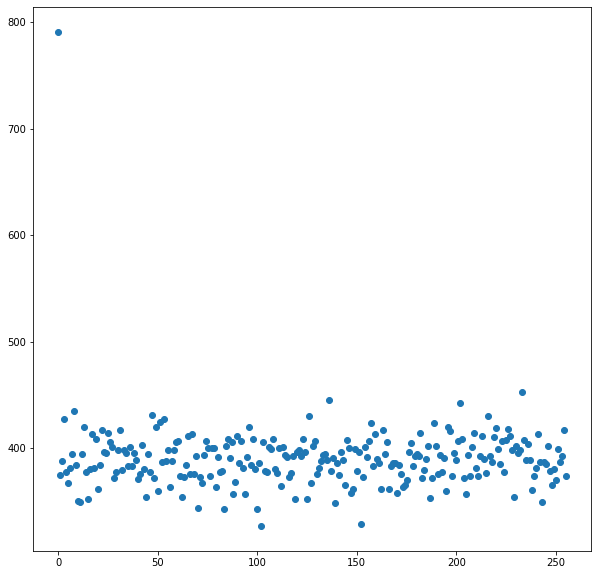

In [59]:
import matplotlib.pyplot as plt
keys = a.keys();
values = a.values();

plt.figure(figsize=(10,10))
plt.scatter(keys,values)
plt.show()

In [73]:
import random
from collections import Counter


def ksa(key):
    s = []
    for i in range(0,256):
        s.append(i)
    j = 0
    for i in range(0,256):
        j = (j + s[i] + key[i % len(key)]) % 256
        s[i],s[j] = s[j], s[i]
    return s

def prga(s):
    # print(s)
    i = 0;j = 0
    key = []
    while (i < 30):
        i = (i + 1) % 256
        j = (j + s[i]) % 256
        s[i], s[j] = s[j], s[i]
        t = (s[i] + s[j]) % 256
        keystreambyte = s[t]
        key.append(keystreambyte)
    return key

def randomkeygen(n):
    ky = []
    for i in range(n):
        ky.append(random.randint(0,100000))
    return ky


In [74]:
allbyte = []
for i in range(100000):
    print(f'done {i}',end= '\r')
    n = 6
    k = randomkeygen(n)
    s = ksa(k)
    key = prga(s)
    allbyte.append(key)


In [76]:
mymp = {i:[] for i in range(1,31)}
for i in range(len(allbyte)):
    for j in range(len(allbyte[i])):
        mymp[j+1].append(allbyte[i][j])


baistuple = []

for i in range(1,31):
    d = Counter(mymp[i])
    p = sorted(d.items(),key=lambda x:x[1],reverse = True)
    baistuple.append(p[:3])

# for i in range(len(baistuple)):
#     for j in range(len(baistuple[i])):
#         baistuple[i][j][1] /= 100000

In [84]:

der = []

for idx,value in enumerate(baistuple):
    der.append([idx]+list(value[0]))
# with open('f.txt','r') as f:
#     data = list(map(int,f.read().split()))
# data
# plt.scatter([i for i in range(256)] , data)
# plt.show() 
der[:30]

[[0, 213, 453],
 [1, 0, 840],
 [2, 22, 457],
 [3, 93, 442],
 [4, 60, 455],
 [5, 10, 439],
 [6, 64, 450],
 [7, 68, 437],
 [8, 116, 448],
 [9, 66, 437],
 [10, 222, 438],
 [11, 188, 444],
 [12, 185, 454],
 [13, 126, 448],
 [14, 6, 449],
 [15, 35, 454],
 [16, 37, 446],
 [17, 76, 459],
 [18, 150, 447],
 [19, 128, 448],
 [20, 125, 433],
 [21, 104, 455],
 [22, 17, 448],
 [23, 132, 444],
 [24, 179, 443],
 [25, 178, 454],
 [26, 63, 452],
 [27, 194, 451],
 [28, 124, 447],
 [29, 222, 460]]

In [85]:
per = sorted(der,key=lambda x:x[2],reverse = True)
per[:5]

[[1, 0, 840], [29, 222, 460], [17, 76, 459], [2, 22, 457], [4, 60, 455]]